# Intern Name : **SHRUTI R. UPHADE**

# ***GRIP - The Sparks Foundation***

# **(Batch : JULY 2021)**

# **Data Science and Business Aalytics**

# TASK 2 :

# From the given ‘Iris’ dataset, predict the optimum number of clusters

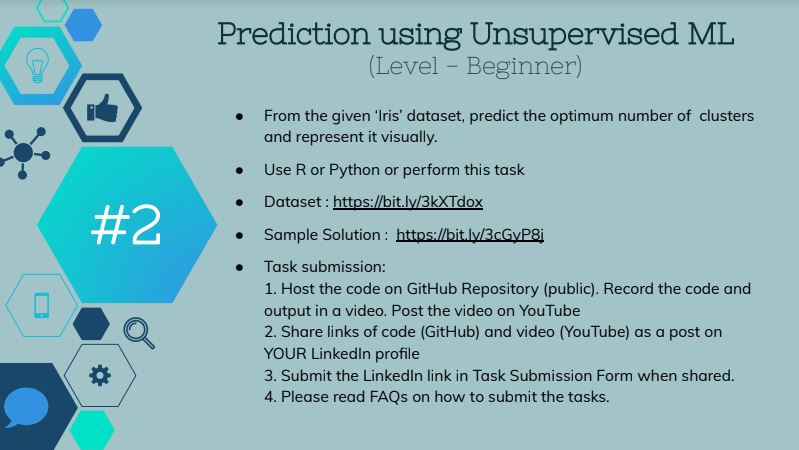


# Importing the required libraries :


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Loading iris data set

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# finding the optimum number of clusters for K Means

In [6]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# plotting the graph

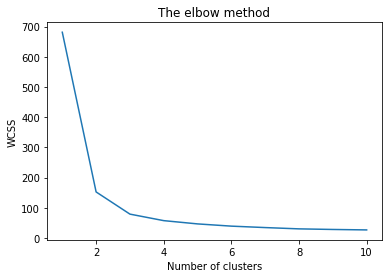

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From above obtained graph , we can clearly see why it is called 'The elbow method'.

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Number of clusters should be chosen such that the Within Cluster Sum of squares(WCSS) doesn't decrease significantly with every iteration.

Here we can see, if we choose number of clusters as 3, the WCSS dosen't decrease significantly in the next iteration. Therefore, It is decided to take number of clusters as 3

# Applying k means to data sets

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Representing the clusters and their centroids visually

Visualizing the clusters on Sepal Width vs Petal Length
Cluster centroids are represented by green colour


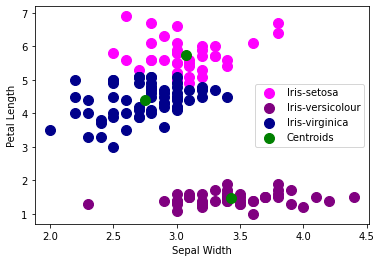

In [9]:
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
            s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2],
            s = 100, c = 'darkblue', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'green', label = 'Centroids')
plt.ylabel("Petal Length")
plt.xlabel("Sepal Width")
plt.legend()

This concludes the K-Means.